In [1]:
import os
import glob
import subprocess
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from photutils import CircularAperture
from photutils import aperture_photometry
from astropy.visualization import simple_norm
from photutils import CircularAperture
from photutils import CircularAnnulus

# from numpy import cov
# from scipy.stats import pearsonr

from scipy import optimize

# %matplotlib tk

In [2]:
files = glob.glob('data/*.fits')

In [3]:
columns = ['JD']
jd = []
for i in range(len(files)):
    jd.append(float(files[i][-11:-5])*24*3600 + float(files[i][10:17])*86400)
df = pd.DataFrame(columns=columns)
df['JD'] = jd

In [4]:
df

,JD
0,2.118434e+11
1,2.118435e+11
2,2.118434e+11
3,2.118434e+11
4,2.118437e+11
...,...
63,2.118435e+11
64,2.118435e+11
65,2.118436e+11
66,2.118435e+11


In [5]:
aperture_sum_list = []


for i in range(len(files)):
    nest_list = []
    hdu = fits.open(files[i])

    w = WCS(hdu[0].header)

    positions = [(100., 100.),(41,115.5),(150,143)]
    aperture = CircularAperture(positions, r=6.)

    image = hdu[0].data

#     annulus_aperture = CircularAnnulus(positions, r_in=8., r_out=11.)
#     annulus_aperture = CircularAnnulus(positions, r_in=8., r_out=10.)
# better
#     annulus_aperture = CircularAnnulus(positions, r_in=11., r_out=13.)

#     if(i==0):
#         norm = simple_norm(image, 'sqrt', percent = 99)
#         plt.figure(figsize=(8,8)) #size
#         plt.style.use(astropy_mpl_style) #styling and gimmicks of astropy
#         plt.imshow(image,vmin=np.median(image)-1*np.std(image),
#                    vmax=np.median(image)+10*np.std(image),cmap='gray')
#         plt.colorbar() #a bar showing the scale of the image
#         aperture.plot(color='white',lw=2)
#         annulus_aperture.plot(color='red',lw=2)
#         annulus_masks = annulus_aperture.to_mask(method='center')
#         plt.imshow(annulus_masks[0], interpolation='nearest')
#         plt.colorbar()

    for j in range(6,11):
        for k in range(1,6):
#             nest_list = []
            annulus_aperture = CircularAnnulus(positions, r_in=j, r_out=j+k)
            apers = [aperture, annulus_aperture]
            phot_table = aperture_photometry(image, apers)
            for col in phot_table.colnames:
                phot_table[col].info.format = '%.8g'  # for consistent table output
#             print(phot_table)

            bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area

            bkg_sum = bkg_mean * aperture.area
            final_sum = phot_table['aperture_sum_0'] - bkg_sum
            phot_table['residual_aperture_sum'] = final_sum
            phot_table['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
#             aperture_sum_list.append(nest_list)
#             print(phot_table)
#             print(len(nest_list))
    
            nest_list.append(phot_table['residual_aperture_sum'])
    aperture_sum_list.append(nest_list)
    
    
#             print(nest_list)
            
# print(aperture_sum_list)

 [astropy.io.fits.verify]
Changed DATE-OBS from '17/12/2000' to '2000-12-17''. [astropy.wcs.wcs]
Changed DATE-OBS from '28/12/2000' to '2000-12-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '28/01/2001' to '2001-01-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '15/12/2000' to '2000-12-15''. [astropy.wcs.wcs]
Changed DATE-OBS from '02/01/2001' to '2001-01-02''. [astropy.wcs.wcs]
Changed DATE-OBS from '17/01/2001' to '2001-01-17''. [astropy.wcs.wcs]
Changed DATE-OBS from '05/02/2001' to '2001-02-05''. [astropy.wcs.wcs]
Changed DATE-OBS from '24/01/2001' to '2001-01-24''. [astropy.wcs.wcs]
Changed DATE-OBS from '21/12/2000' to '2000-12-21''. [astropy.wcs.wcs]
Changed DATE-OBS from '01/02/2001' to '2001-02-01''. [astropy.wcs.wcs]
Changed DATE-OBS from '01/01/2001' to '2001-01-01''. [astropy.wcs.wcs]
Changed DATE-OBS from '30/01/2001' to '2001-01-30''. [astropy.wcs.wcs]
Changed DATE-OBS from '04/02/2001' to '2001-02-04''. [astropy.wcs.wcs]
Changed DATE-OBS from '22/01/2001' to '2001-01-22''

In [6]:
len(nest_list)

25

In [7]:
len(aperture_sum_list[0])

25

In [8]:
ins_mag_0_6_7 = []
ins_mag_1_6_7 = []
ins_mag_2_6_7 = []

for i in range(len(aperture_sum_list)): 
        ins_mag_0_6_7.append(aperture_sum_list[i][0][0])
        ins_mag_1_6_7.append(aperture_sum_list[i][0][1])        
        ins_mag_2_6_7.append(aperture_sum_list[i][0][2])        

In [9]:
ins_mag_2_6_7

[400455.3952306757,
 329622.5275974796,
 417828.2571725526,
 287275.00843090226,
 386076.9929266636,
 281747.45871032204,
 453973.7689016216,
 55437.93753748352,
 294519.0260654463,
 317267.6040325736,
 385508.19125749974,
 218457.3119111135,
 397581.39901919255,
 385503.90575547446,
 411063.66051112185,
 433561.71651957993,
 326443.6207557741,
 297135.12866887084,
 457935.4677749409,
 271079.0266848182,
 263222.0360187695,
 375631.85456423636,
 339843.25187153474,
 443358.5715948471,
 339934.3647401898,
 406407.49425435066,
 58237.59268960147,
 330359.6090425744,
 394063.0336244293,
 300437.61907980125,
 364073.0822583322,
 357556.3088106037,
 395484.8605682589,
 450895.1443505637,
 310593.5299988581,
 445288.62681277504,
 330066.19808918325,
 362661.2576277121,
 328459.497312129,
 329148.32889599557,
 276342.64447655284,
 407825.3204642299,
 478349.4230181609,
 484439.0076364142,
 251765.3023551521,
 339022.9122798499,
 252250.00511937897,
 379296.8099686314,
 428696.18421728886,
 42

In [10]:
aperture_sum_list_0_6_7

NameError: name 'aperture_sum_list_0_6_7' is not defined

In [11]:
aperture_sum_list_0=[]
aperture_sum_list_1=[]
aperture_sum_list_2=[]
for i in range(len(aperture_sum_list)):
    aperture_sum_list_0.append(-2.5*np.log(aperture_sum_list[i][0]))
    aperture_sum_list_1.append(-2.5*np.log(aperture_sum_list[i][1]))
    aperture_sum_list_2.append(-2.5*np.log(aperture_sum_list[i][2]))


In [12]:
df['ins_mag_0'] = aperture_sum_list_0
df['ins_mag_1'] = aperture_sum_list_1
df['ins_mag_2'] = aperture_sum_list_2

In [13]:
df

,JD,ins_mag_0,ins_mag_1,ins_mag_2
0,2.118434e+11,"[-25.16799012703895, -31.612009824408666, -32....","[-25.143302035807533, -31.812058663224917, -32...","[-25.015836904044978, -31.932732244413543, -32..."
1,2.118435e+11,"[-22.489921658320135, -32.01991306006481, -31....","[-22.371956817383026, -32.06220250618469, -31....","[-22.25201986004112, -32.09007145756328, -31.8..."
2,2.118434e+11,"[-25.074048725162385, -32.50782536051644, -32....","[-24.979202418925528, -32.69394173700233, -32....","[-24.757789496391798, -32.80630522424086, -32...."
3,2.118434e+11,"[-25.438058341235767, -31.697856628041166, -31...","[-25.407079178941544, -31.878386167662708, -31...","[-25.292050889690792, -31.994985413791106, -31..."
4,2.118437e+11,"[-25.32741839023286, -31.416516804760075, -32....","[-25.273411476484327, -31.606923137473597, -32...","[-25.057999169642322, -31.723924963375353, -32..."
...,...,...,...,...
63,2.118435e+11,"[-23.62609739088148, -31.75146572632996, -32.0...","[-23.506880742589985, -31.917179936096467, -32...","[-23.264459396848434, -32.02350947967483, -32...."
64,2.118435e+11,"[-25.533617594299834, -32.552659542741125, -31...","[-25.645847336602614, -32.66679967211137, -31....","[-25.519936885444064, -32.742889416183694, -31..."
65,2.118436e+11,"[-25.132603256309146, -31.75937603613241, -31....","[-25.205251916214003, -31.966960801336647, -32...","[-24.995808643048147, -32.096512517518235, -32..."
66,2.118435e+11,"[-24.597556992027087, -30.419287308374813, -31...","[-24.84217399457467, -30.787316278769946, -31....","[-24.703142572609202, -31.009972766026465, -31..."


In [14]:
df = df.sort_values(by=['JD'])

In [15]:
df['da_1'].min()

KeyError: 'da_1'

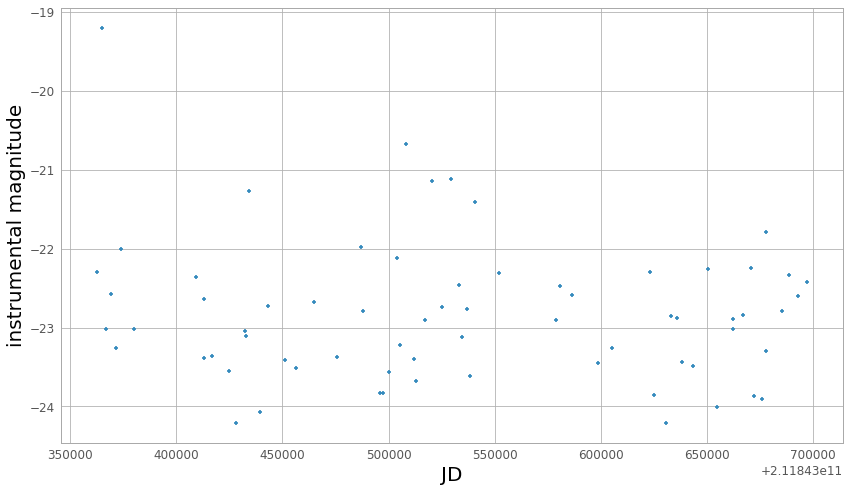

In [219]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

y0 = df["ins_mag_0"]
y1 = df["ins_mag_1"]
y2 = df["ins_mag_2"]
x = df["JD"]
ax.set_xlabel('JD', fontsize=20)
ax.set_ylabel('instrumental magnitude',fontsize=20)

ax.scatter(x,y0,s=20,marker='+')
# ax.scatter(x,y1,s=20,marker='o')
# ax.scatter(x,y2,s=20,marker='x')

# def objective(x, a, b, c):
#     return a * np.sin(b*x) + c

# popt, _ = optimize.curve_fit(objective, x1, y1)

# a, b, c = popt

# x_new = np.arange(df['JD'].min(),df['JD'].max(), 10000)
# y_new = objective(x_new, a, b, c)

# ax.scatter(x_new,y_new)



In [220]:
df['da_0'] = df['ins_mag_0']-df['ins_mag_2']
df['da_1'] = df['ins_mag_1']-df['ins_mag_2']
df['da_2'] = df['ins_mag_2']-df['ins_mag_2']


KeyError: 'da_0'

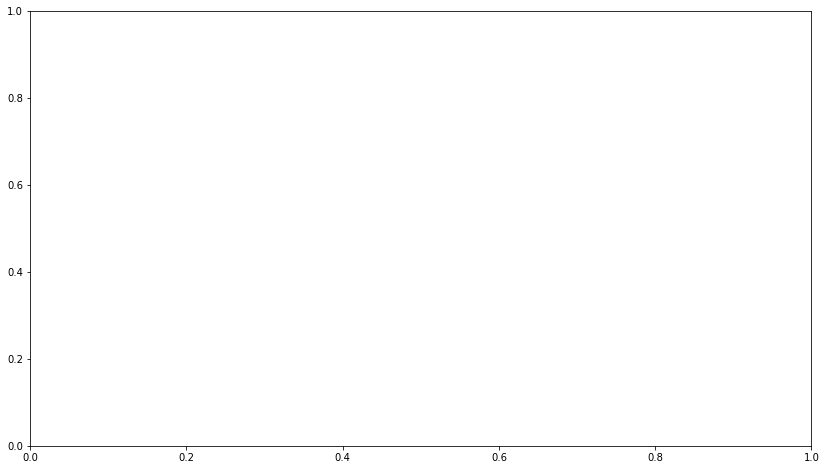

In [16]:
fig, ax = plt.subplots(1,1, figsize=(14,8))

y0 = df["da_0"]
y1 = df["da_1"]
y2 = df["da_2"]
x = df["JD"]
ax.set_xlabel('JD', fontsize=20)
ax.set_ylabel('differential magnitude',fontsize=20)

ax.scatter(x,y0,s=20,marker='+')
ax.scatter(x,y1,s=20,marker='o')
ax.scatter(x,y2,s=20,marker='x')

# def objective(x, a, b, c):
#     return a * np.sin(b*x) + c

# popt, _ = optimize.curve_fit(objective, x1, y1)

# a, b, c = popt

# x_new = np.arange(df['JD'].min(),df['JD'].max(), 10000)
# y_new = objective(x_new, a, b, c)

# ax.scatter(x_new,y_new)

